# Rohdatensatz explorieren

Der hier verwendete Datensatz ist von Kaggle:

"Used Cars Dataset - Vehicles listings from Craigslist.org"

URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Er ist allerdings sehr groß! Entpackt ist es eine .csv Datei mit 1.4 GB und enthält 458213 Angebote von gebrauchten Autos.

Deswegen werden wir im ersten Schritt einen kleineren handlicheren Datensatz erzeugen, in dem wir unvollständige Einträge verwerfen.

In [1]:
import pandas as pd

In [2]:
fname = "/home/juebrauer/link_to_vcd/12_datasets/13_craigslist_used_cars/vehicles.csv"
tabelle_gross = pd.read_csv(fname)

In [3]:
tabelle_gross

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


Die Form der Daten gibt uns Auskunft über Anzahl der Zeilen und Spalten (=Merkmale pro Auto):

In [4]:
tabelle_gross.shape

(458213, 26)

Schauen wir uns mal ein einziges Beispiel an:

In [5]:
tabelle_gross.iloc[0]

Unnamed: 0                                                      0
id                                                     7240372487
url             https://auburn.craigslist.org/ctd/d/auburn-uni...
region                                                     auburn
region_url                          https://auburn.craigslist.org
price                                                       35990
year                                                      2010.00
manufacturer                                            chevrolet
model                                        corvette grand sport
condition                                                    good
cylinders                                             8 cylinders
fuel                                                          gas
odometer                                                 32742.00
title_status                                                clean
transmission                                                other
VIN       

Was für Spalten gibt es überhaupt?

In [6]:
tabelle_gross.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Allerdings sind nicht alle der 26 Spalten bei den 458213 Autobeispielen vollständig ausgefüllt:

In [7]:
tabelle_gross.count()

Unnamed: 0      458213
id              458213
url             458213
region          458213
region_url      458213
price           458213
year            457163
manufacturer    439993
model           453367
condition       265273
cylinders       287073
fuel            454976
odometer        402910
title_status    455636
transmission    455771
VIN             270664
drive           324025
size            136865
type            345475
paint_color     317370
image_url       458185
description     458143
state           458213
lat             450765
long            450765
posting_date    458185
dtype: int64

Die `count()` Methode es einen Pandas-DataFrames liefert übrigens als Ergebnis eine Pandas-Series:

In [8]:
type( tabelle_gross.count() )

pandas.core.series.Series

D.h. wir können uns diesen Anzahlen von vollständig ausgefüllten Werten pro Spalte als NumPy-Array zurückgeben lassen:

In [9]:
tabelle_gross.count().values

array([458213, 458213, 458213, 458213, 458213, 458213, 457163, 439993,
       453367, 265273, 287073, 454976, 402910, 455636, 455771, 270664,
       324025, 136865, 345475, 317370, 458185, 458143, 458213, 450765,
       450765, 458185])

Wir können uns auch anders herum ausgeben lassen wieviele Werte fehlen:

In [10]:
tabelle_gross.isnull()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Da wo jetzt `True` steht fehlt ein Wert. Mittels `sum()` können wir dann spaltenweise zählen wieviele Werte fehlen, denn `True` wird als `1` und `False` als `0` interpretiert:

In [11]:
tabelle_gross.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

# Kleineren Datensatz erzeugen

Wir selektieren jetzt nur einige Spalten, damit die folgenden Analysen handlicher werden:

In [12]:
tabelle_klein = tabelle_gross[ ["price", "year", "manufacturer", "model", 
                                "fuel", "odometer", "paint_color", "state"] ]

In [13]:
tabelle_klein

,price,year,manufacturer,model,fuel,odometer,paint_color,state
0,35990,2010.0,chevrolet,corvette grand sport,gas,32742.0,NaN,al
1,7500,2014.0,hyundai,sonata,gas,93600.0,NaN,al
2,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
3,2000,1974.0,chevrolet,c-10,gas,190000.0,blue,al
4,19500,2005.0,ford,f350 lariat,diesel,116000.0,blue,al
...,...,...,...,...,...,...,...,...
458208,14995,2014.0,cadillac,srx,gas,83790.0,silver,wi
458209,17895,2018.0,hyundai,tucson,gas,31888.0,white,wi
458210,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,black,wy
458211,1300,2008.0,jeep,grand cherokee,gas,164000.0,white,wy


Jetzt verwerfen wir der Einfachheit alle Einträge mit fehlenden (=`NaN`) Werten:

In [14]:
tabelle_vollstaendig = tabelle_klein.dropna()

In [15]:
tabelle_vollstaendig

,price,year,manufacturer,model,fuel,odometer,paint_color,state
2,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
3,2000,1974.0,chevrolet,c-10,gas,190000.0,blue,al
4,19500,2005.0,ford,f350 lariat,diesel,116000.0,blue,al
5,29590,2016.0,toyota,tacoma double cab sr5,gas,33290.0,red,al
6,39990,2012.0,ford,mustang shelby gt500 coupe,gas,9692.0,blue,al
...,...,...,...,...,...,...,...,...
458206,5300,2013.0,chevrolet,captiva,gas,140000.0,blue,wi
458208,14995,2014.0,cadillac,srx,gas,83790.0,silver,wi
458209,17895,2018.0,hyundai,tucson,gas,31888.0,white,wi
458210,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,black,wy


Wir benennen jetzt auch die Spalten auf Deutsch um:

In [16]:
tabelle_vollstaendig = tabelle_vollstaendig.rename( columns= {"price"        : "Preis",
                                                              "year"         : "Baujahr",
                                                              "manufacturer" : "Hersteller",
                                                              "model"        : "Modell",
                                                              "fuel"         : "Kraftstoff",
                                                              "odometer"     : "km-Stand",
                                                              "paint_color"  : "Farbe",
                                                              "state"        : "Bundesstaat"} )

In [17]:
tabelle_vollstaendig

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
2,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
3,2000,1974.0,chevrolet,c-10,gas,190000.0,blue,al
4,19500,2005.0,ford,f350 lariat,diesel,116000.0,blue,al
5,29590,2016.0,toyota,tacoma double cab sr5,gas,33290.0,red,al
6,39990,2012.0,ford,mustang shelby gt500 coupe,gas,9692.0,blue,al
...,...,...,...,...,...,...,...,...
458206,5300,2013.0,chevrolet,captiva,gas,140000.0,blue,wi
458208,14995,2014.0,cadillac,srx,gas,83790.0,silver,wi
458209,17895,2018.0,hyundai,tucson,gas,31888.0,white,wi
458210,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,black,wy


Der Index des Pandas-DataFrames ist nach der Filterung noch nicht durchgehend:

In [18]:
tabelle_vollstaendig.reset_index(drop=True, inplace=True)

In [19]:
tabelle_vollstaendig

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
0,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
1,2000,1974.0,chevrolet,c-10,gas,190000.0,blue,al
2,19500,2005.0,ford,f350 lariat,diesel,116000.0,blue,al
3,29590,2016.0,toyota,tacoma double cab sr5,gas,33290.0,red,al
4,39990,2012.0,ford,mustang shelby gt500 coupe,gas,9692.0,blue,al
...,...,...,...,...,...,...,...,...
285872,5300,2013.0,chevrolet,captiva,gas,140000.0,blue,wi
285873,14995,2014.0,cadillac,srx,gas,83790.0,silver,wi
285874,17895,2018.0,hyundai,tucson,gas,31888.0,white,wi
285875,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,black,wy


In [20]:
tabelle_vollstaendig.to_csv("gebrauchtwagen_usa.csv", index=False)

# Kleine gefilterte Tabelle einlesen

In [21]:
import pandas as pd
fname = "gebrauchtwagen_usa.csv"
tabelle = pd.read_csv( fname, index_col=False )

In [22]:
tabelle

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
0,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
1,2000,1974.0,chevrolet,c-10,gas,190000.0,blue,al
2,19500,2005.0,ford,f350 lariat,diesel,116000.0,blue,al
3,29590,2016.0,toyota,tacoma double cab sr5,gas,33290.0,red,al
4,39990,2012.0,ford,mustang shelby gt500 coupe,gas,9692.0,blue,al
...,...,...,...,...,...,...,...,...
285872,5300,2013.0,chevrolet,captiva,gas,140000.0,blue,wi
285873,14995,2014.0,cadillac,srx,gas,83790.0,silver,wi
285874,17895,2018.0,hyundai,tucson,gas,31888.0,white,wi
285875,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,black,wy


# Analyse möglicher Werte in kategorialen Spalten

Die Tabelle hat nun kategoriale Spalten wie `Hersteller`, `Modell`, `Kraftstoff`, `Farbe` und `Bundesstaat` und numerische Spalten wie `Preis`, `Baujahr`, `km-Stand`.

Was für mögliche Aufzählungswerte sind zum Beispiel für `Hersteller` möglich?

In [23]:
tabelle["Hersteller"].unique()

array(['bmw', 'chevrolet', 'ford', 'toyota', 'jeep', 'honda', 'dodge',
       'gmc', 'hyundai', 'subaru', 'mazda', 'mini', 'ram', 'nissan',
       'mercedes-benz', 'lexus', 'volkswagen', 'kia', 'lincoln',
       'mitsubishi', 'buick', 'audi', 'cadillac', 'infiniti', 'rover',
       'acura', 'chrysler', 'pontiac', 'tesla', 'volvo', 'fiat', 'datsun',
       'mercury', 'saturn', 'porsche', 'jaguar', 'ferrari', 'alfa-romeo',
       'land rover', 'harley-davidson', 'aston-martin', 'morgan'],
      dtype=object)

Wieviele verschiedene Hersteller gibt es?

In [24]:
len( tabelle["Hersteller"].unique() )

42

Was für Modelle gibt es?

In [25]:
tabelle["Modell"].unique()

array(['x3 3.0i', 'c-10', 'f350 lariat', ..., 'f-350 crew dump',
       'sportage lx 4wd', 'f-150 xlt supercrew cab'], dtype=object)

Wieviele verschiedene Modelle gibt es?

In [26]:
len( tabelle["Modell"].unique() )

18059

Schränken wir uns mal ein. Wieviele BMW Modelle gibt es?

In [27]:
nur_BMWs = tabelle[ tabelle["Hersteller"] == "bmw" ]
nur_BMWs

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
0,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
7,36990,2013.0,bmw,m3 coupe 2d,gas,50956.0,black,al
19,27990,2012.0,bmw,m3 convertible 2d,gas,61881.0,black,al
78,4900,2006.0,bmw,325ci,gas,150000.0,red,al
140,18990,2014.0,bmw,3 series,gas,53352.0,white,al
...,...,...,...,...,...,...,...,...
285505,26500,2016.0,bmw,x5 xdrive35i,gas,95048.0,grey,va
285548,15700,2012.0,bmw,335i coupe,gas,59000.0,blue,wa
285605,22952,2014.0,bmw,3 series,gas,37664.0,grey,wa
285643,4988,2004.0,bmw,x5,gas,177665.0,white,wa


In [28]:
nur_BMWs["Modell"].unique()

array(['x3 3.0i', 'm3 coupe 2d', 'm3 convertible 2d', '325ci', '3 series',
       '328i', 'z3', '1-series', 'z4', '135i', '325is', '330i',
       '135i convertible', 'm3 convertible', 'z4 2.5i', '325i',
       'x5 xdrive35d', '3 series 328i coupe 2d', 'x5', 'x3 xdrive30i',
       '5 series', '3-series', '3 series 335i sedan 4d',
       '328i sedan sulev', '428i gran coupe', '528i sedan',
       'i3 range extender', 'x3', 'x6 xdrive50i', '6 series', '318i',
       'x6', 'x5 xdrive35i', '3 series 328i', '6-series', '550',
       '328i nav sport pkg.', 'm3', '7 series', '328d', '328i xdrive',
       '335i xdrive', '430i xdrive', 'x6 xdrive50i awd', '320i', '335xi',
       '3 series 335i xdrive', 'x3 xdrive28i', '320i xdrive', 'x3 3.0si',
       'x2 xdrive28i', 'x1 x', '328d xdrive', 'x4 m-sport awd',
       'm3 coupe', '528xi', 'x1', 'x3 m40i m sport pkg awd',
       '740i sedan 3.0 liter 315hp turbo i6', 'i3 s w/range extender',
       '5 series 528i sedan 4d', 'x4 m40i sport utility 4d'

In [29]:
len( nur_BMWs["Modell"].unique() )

809

OK. Das sind immer noch 809 verschiedene BMW Modelle!

In [30]:
tabelle["Kraftstoff"].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [31]:
tabelle["Farbe"].unique()

array(['blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [32]:
tabelle["Bundesstaat"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [33]:
len( tabelle["Bundesstaat"].unique() )

51

# Deskriptive Statistik für Plausibilitätschecks

In [34]:
tabelle.describe()

,Preis,Baujahr,km-Stand
count,2.858770e+05,285877.000000,2.858770e+05
mean,2.933290e+04,2011.623758,1.020471e+05
std,6.768121e+06,7.175194,3.824349e+06
min,0.000000e+00,1911.000000,0.000000e+00
25%,5.964000e+03,2008.000000,4.113100e+04
50%,1.259000e+04,2013.000000,8.699600e+04
75%,2.299000e+04,2016.000000,1.327370e+05
max,3.615215e+09,2021.000000,2.043756e+09


Wie können wir die wissenschaftliche Notation unterdrücken?

Siehe https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

In [35]:
pd.options.display.float_format = "{:.5f}".format

In [36]:
tabelle.describe()

,Preis,Baujahr,km-Stand
count,285877.00000,285877.00000,285877.00000
mean,29332.90293,2011.62376,102047.05506
std,6768121.45045,7.17519,3824349.10593
min,0.00000,1911.00000,0.00000
25%,5964.00000,2008.00000,41131.00000
50%,12590.00000,2013.00000,86996.00000
75%,22990.00000,2016.00000,132737.00000
max,3615215112.00000,2021.00000,2043755555.00000


Wir können an der deskriptiven Statistik schnell erkennen: da ist was falsch!

Es gibt mindestens ein Auto mit einem gigantischen Preis und ein Auto mit einem gigantischen km-Stand.

Wir sollten also mal einen Plausibilitätscheck durchführen:

Gibt es Autos, die für mehr als $500000 angeboten werden?

In [37]:
tabelle[ tabelle["Preis"] > 500000 ]

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
58402,999000,2017.00000,mercedes-benz,amg g 63,gas,4085.00000,white,fl
69477,3429900,2017.00000,jeep,wrangler unlimited,gas,16695.00000,black,fl
106021,1234567,1997.00000,chevrolet,silverado,gas,150000.00000,blue,ky
110358,22000000,2015.00000,toyota,tacoma,gas,71000.00000,white,la
120781,625000,2020.00000,ferrari,488 pista spider,gas,70.00000,silver,ma
148196,98504250,2008.00000,ford,ranger,gas,119143.00000,grey,nc
159198,12345678,2004.00000,toyota,prius,hybrid,14200.00000,silver,nj
190624,123456789,2018.00000,ram,3500 crewcab tradesma,diesel,83700.00000,grey,oh
239784,3615215112,2006.00000,chevrolet,silverado 2500hd,diesel,117500.00000,red,tx
240114,1111111,2000.00000,chevrolet,silverado,gas,178000.00000,custom,tx


Tatsächlich! Diese Preise sind nicht wirklich ernst zu nehmen vermute ich. Daher entfernen wir diese von der Liste:

In [38]:
len(tabelle)

285877

In [39]:
tabelle = tabelle[ tabelle["Preis"] <= 500000 ]

In [40]:
len(tabelle)

285866

Und jetzt zu unrealistischen km-Ständen. Gibt es irgendein Auto-Angebot mit mehr als 500000 Meilen?

In [41]:
tabelle[ tabelle["km-Stand"] > 500000 ]

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
430,15000,2003.00000,volvo,vnl 780,diesel,1000000.00000,white,al
535,2200,1999.00000,gmc,savana 3500,gas,513189.00000,blue,al
722,3950,1941.00000,dodge,brothers,gas,999999.00000,green,al
2220,3777,2009.00000,pontiac,vibe gt,gas,1840000.00000,black,al
2283,10000,1967.00000,mercury,cougar,gas,1000000.00000,custom,al
...,...,...,...,...,...,...,...,...
281438,8300,2006.00000,volvo,vnl780,diesel,1800000.00000,green,ma
282370,5000,2011.00000,jeep,patriot,gas,1340000.00000,silver,nc
283421,500,2007.00000,volkswagen,rabbit,gas,1000000.00000,black,nh
285192,6900,2012.00000,jeep,patriot latitude 4x4,gas,985114.00000,black,tx


Vielleicht stimmen bei einigen Angeboten diese km-Stände. Aber die Angebote mit genau oder größer 1.000.000 Meilen kommen mir sehr unplausibel vor! Also entfernen:

In [42]:
tabelle = tabelle[ tabelle["km-Stand"] < 999999 ]

In [43]:
len(tabelle)

285594

Es sind jetzt also nochmal ein paar Autos weniger geworden.

Schauen wir uns jetzt nochmal die deskriptive Statistik an:

In [44]:
tabelle.describe()

,Preis,Baujahr,km-Stand
count,285594.00000,285594.00000,285594.00000
mean,15769.97752,2011.63544,92608.04043
std,13566.60094,7.15256,62831.59941
min,0.00000,1911.00000,0.00000
25%,5975.50000,2008.00000,41074.50000
50%,12590.00000,2013.00000,86860.00000
75%,22990.00000,2016.00000,132528.00000
max,389500.00000,2021.00000,999990.00000


# Analyse eines numerischen Merkmals: Histogramm

Wir nehmen mal ein einzelnes Merkmal genauer unter die Lupe: den Preis.

Um zu verstehen wie oft bestimmte Preise für gebrauchte Autos verlangt werden, können Histogramme erzeugt werden:

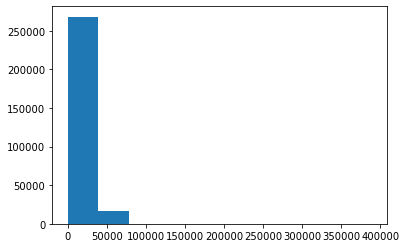

In [45]:
from matplotlib import pyplot as plt

plt.hist( tabelle["Preis"] )
plt.show()

Na das war ja nicht sehr hilfreich. Die wenigen Ausreißer / Angebote mit hohen Preisen machen uns das Histogramm kaputt. Also gleich nochmal: dieses Mal schränken wir die Preise noch so ein, dass wir als Maximalpreis genau den Preis nehmen, so dass 95% der Autos dabei sind:

In [46]:
verkaufspreis = tabelle["Preis"].quantile(0.95)
verkaufspreis

39991.0

In [47]:
autos_typische_verkaufspreise = tabelle[ tabelle["Preis"] < verkaufspreis ]

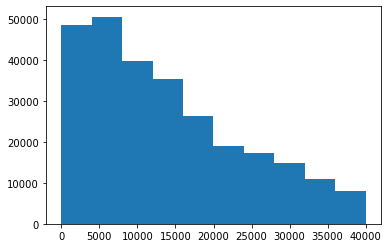

In [48]:
plt.hist( autos_typische_verkaufspreise["Preis"] )
plt.show()

Wir können die Unterteilung jetzt noch feiner machen:

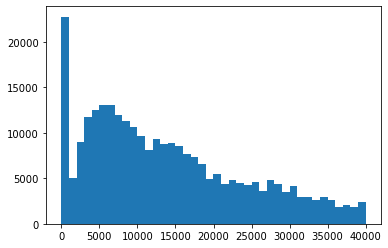

In [49]:
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40 )
plt.show()

Man sieht, dass die meisten gebrauchten Autos anscheinend für unter $1000 gehandelt werden.

Jetzt wäre es noch schön, das Histogramm-Diagramm hübscher zu machen, z.B., dass man die einzelnen Balken der Häufigkeiten klar unterscheiden kann:

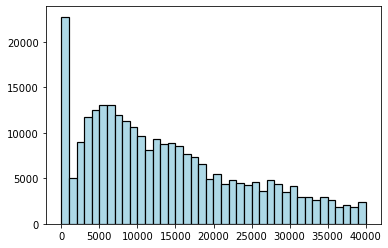

In [50]:
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
         color="lightblue" )
plt.show()

Das Diagramm könnte noch verbessert werden:
- größer
- Achsen beschriften
- Titel

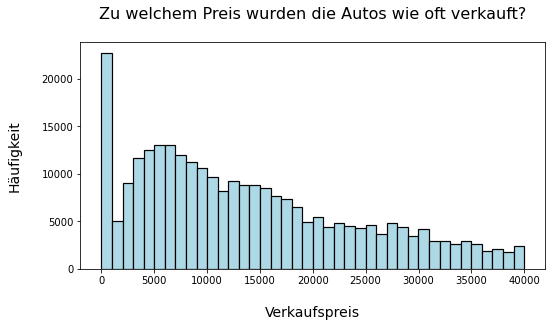

In [51]:
figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(600*px, 300*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Schön wäre auch noch ein Gitter mit Hilfslinien zum besser Ablesen der Werte:

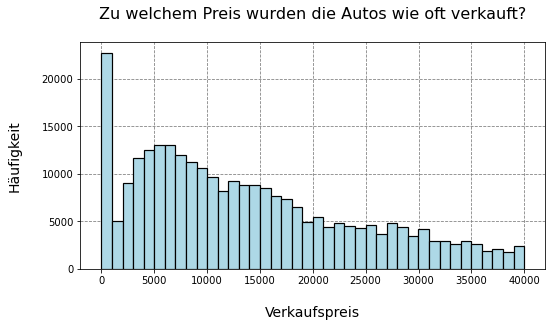

In [52]:
figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(600*px, 300*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

axis = plt.gca()
axis.set_axisbelow(True)
plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Die Anzahl und die genauen Stellen der Gitterhilfslinien können folgendermaßen definiert werden:

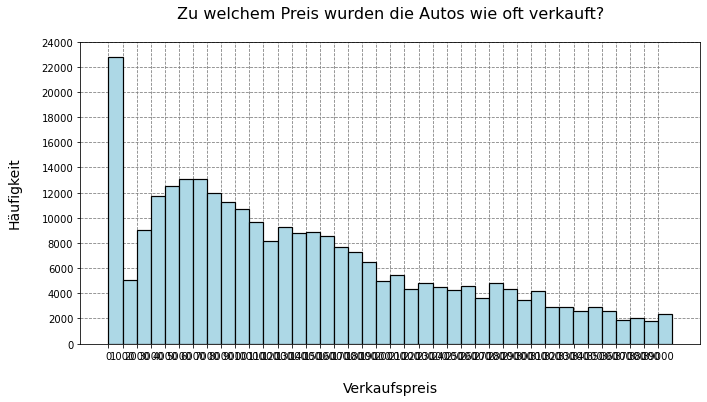

In [53]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Jetzt haben wir viel mehr Hilfslinien, aber auch ein neues Problem: die Beschriftungen der Ticks auf der horizontalen Achse überlappen sich!

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000]
[0, '', '', '', '', 5000, '', '', '', '', 10000, '', '', '', '', 15000, '', '', '', '', 20000, '', '', '', '', 25000, '', '', '', '', 30000, '', '', '', '', 35000, '', '', '', '']


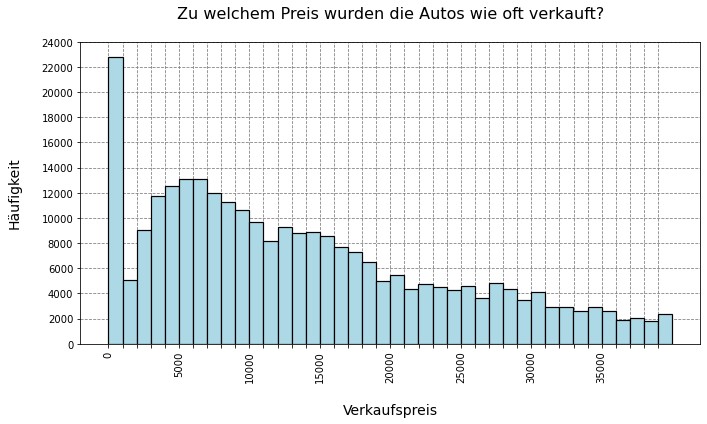

In [54]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

print(x_ticks)
x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")
print(x_tick_labels)

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Ein tolles Diagramm! Jetzt wollen wir es abspeichern.

x_ticks:  [    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000]
x_tick_labels:  [0, '', '', '', '', 5000, '', '', '', '', 10000, '', '', '', '', 15000, '', '', '', '', 20000, '', '', '', '', 25000, '', '', '', '', 30000, '', '', '', '', 35000, '', '', '', '']


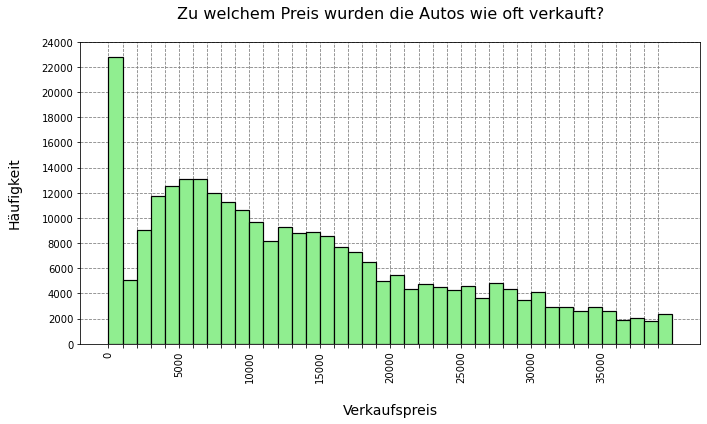

In [55]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightgreen" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

print("x_ticks: ", x_ticks)
x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")
print("x_tick_labels: ", x_tick_labels)

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

# Median einzeichnen

Jetzt wäre es toll, wenn der Mittelwert noch im Diagramm eingezeichnet wäre, z.B. als Linie:

In [56]:
autos_typische_verkaufspreise["Preis"]

0          4900
1          2000
2         19500
3         29590
4         39990
          ...  
285872     5300
285873    14995
285874    17895
285875    17900
285876     1300
Name: Preis, Length: 271300, dtype: int64

In [57]:
autos_typische_verkaufspreise["Preis"].mean()

13868.411481754516

Es gibt in der deskriptiven Statistik aber auch noch andere *Lageparameter*, v.a. den Median:

In [58]:
autos_typische_verkaufspreise["Preis"].median()

11900.0

Zum Unterschied Mittelwert vs. Median:

In [59]:
daten = np.array( [1,2,3,4, 5, 6,7,8,9] )

In [60]:
np.mean( daten )

5.0

In [61]:
np.median( daten )

5.0

In [62]:
daten2 = np.array( [1,2,3,4, 5, 6,7,80000,9] )

In [63]:
np.mean( daten2 )

8893.0

In [64]:
np.median( daten2 )

5.0

Der Mittelwert ist also anfällig für Ausreißer, der Median nicht. Daher nehmen wir jetzt den Median:

In [65]:
verkaufspreis_median = autos_typische_verkaufspreise["Preis"].median()
verkaufspreis_median

11900.0

x_ticks:  [    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000]
x_tick_labels:  [0, '', '', '', '', 5000, '', '', '', '', 10000, '', '', '', '', 15000, '', '', '', '', 20000, '', '', '', '', 25000, '', '', '', '', 30000, '', '', '', '', 35000, '', '', '', '']


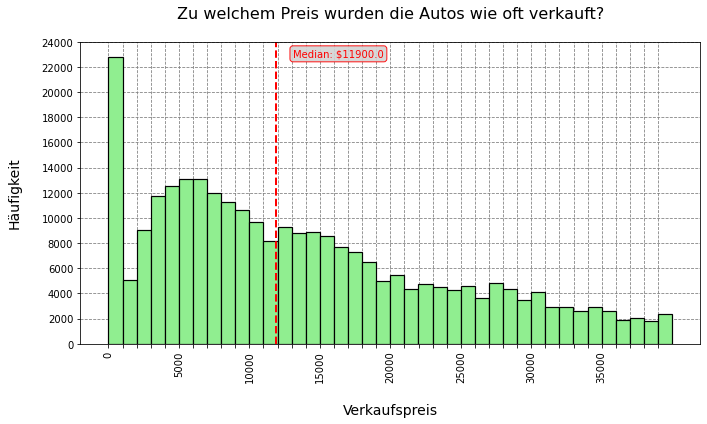

In [66]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightgreen" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

print("x_ticks: ", x_ticks)
x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")
print("x_tick_labels: ", x_tick_labels)

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.axvline(verkaufspreis_median, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='lightgray', edgecolor="red", alpha=0.9)
plt.text(verkaufspreis_median*1.1, max_ylim*0.95,
         'Median: ${:.1f}'.format(verkaufspreis_median),
         bbox=props, color="red")

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

# Verteilungsfunktion

Wir betrachten jetzt eine Variante des Histogramms.

Statt in Bins jeweils zu zählen, wieviele Autos für diesen entsprechenden Preis verkauft wurden, betrachten wir eine *kumulative Variante* des Histogramms:

Hierzu gibt es bei der Funktion `plt.hist()` einen Schalter, um die sog. *Verteilungsfunktion* zu erzeugen.

Andere Bezeichnungen:
- [*empirische Verteilungsfunktion*](https://de.wikipedia.org/wiki/Empirische_Verteilungsfunktion)
- *Summenhäufigkeitsfunktion*
- im Englischen *Cumulative Distribution Function (CDF)*

Als erstes erzeugen wir aber ein Diagramm mit relativen Häufigkeiten:

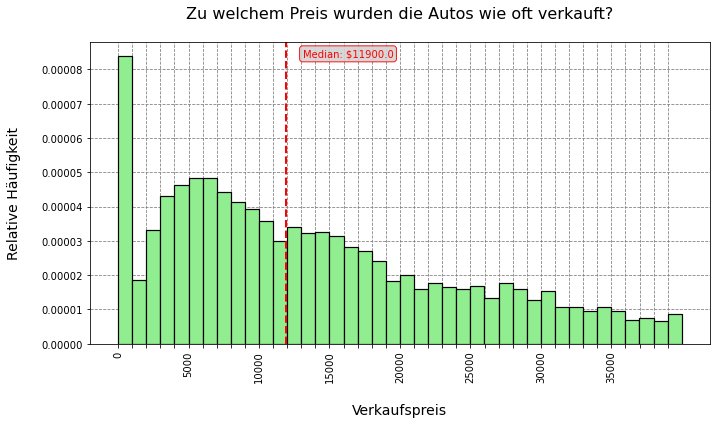

In [67]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

# !!! Schalter: density
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightgreen", density=True )

ax = plt.gca()
ax.set_axisbelow(True)

# !!!
# vermeide wissenschaftliche Notation für vertikale Achse
ax.ticklabel_format(useOffset=False, style='plain')

x_ticks = np.arange(0, 40000, 1000)
ax.set_xticks(x_ticks)

x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Relative Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.axvline(verkaufspreis_median, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='lightgray', edgecolor="red", alpha=0.9)
plt.text(verkaufspreis_median*1.1, max_ylim*0.95,
         'Median: ${:.1f}'.format(verkaufspreis_median),
         bbox=props, color="red")

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

Jetzt erzeugen wir eine kumulative Variante des Histogramms:

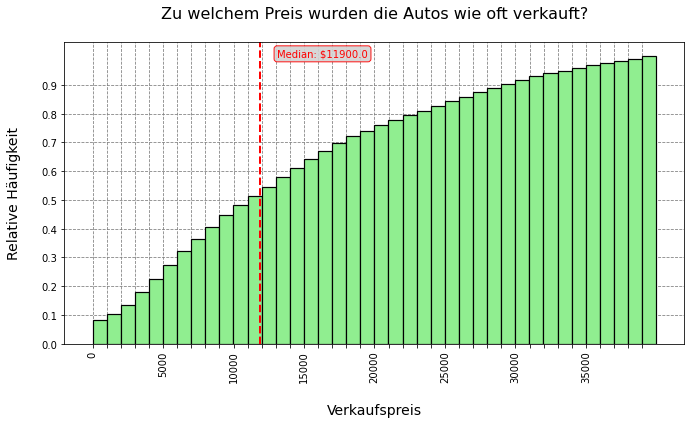

In [68]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

# !!! Schalter: cumulative
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightgreen", density=True, cumulative=True )

ax = plt.gca()
ax.set_axisbelow(True)

ax.ticklabel_format(useOffset=False, style='plain')

x_ticks = np.arange(0, 40000, 1000)
ax.set_xticks(x_ticks)

# !!! Ticks auf y-Achse neu setzen
y_ticks = np.arange(0, 1.0, 0.1)
ax.set_yticks(y_ticks)


x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Relative Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.axvline(verkaufspreis_median, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='lightgray', edgecolor="red", alpha=0.9)
plt.text(verkaufspreis_median*1.1, max_ylim*0.95,
         'Median: ${:.1f}'.format(verkaufspreis_median),
         bbox=props, color="red")

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

Wir können übrigens statt Balken auch Linien in diesem kumulativen Histogramm erzeugen:

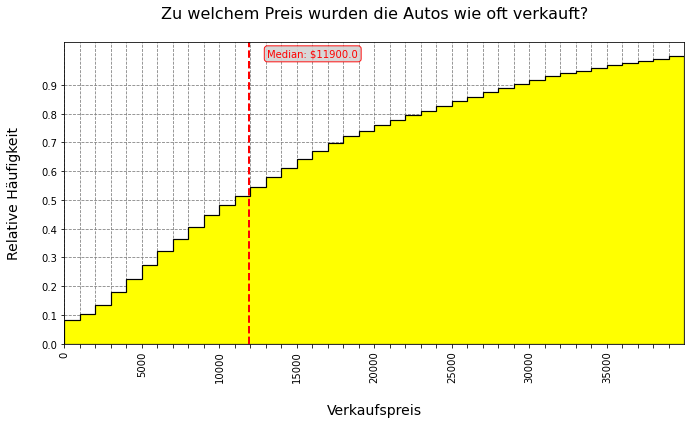

In [69]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

# !!! Schalter: histtype --> probiere auf "step", "stepfilled" bzw. "bar" zu setzen
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="yellow", density=True, cumulative=True, histtype="stepfilled" )

ax = plt.gca()
ax.set_axisbelow(True)

ax.ticklabel_format(useOffset=False, style='plain')

x_ticks = np.arange(0, 40000, 1000)
ax.set_xticks(x_ticks)

y_ticks = np.arange(0, 1.0, 0.1)
ax.set_yticks(y_ticks)

x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

# !!! xlim zum Setzen des angezeigten x-Intervalls
plt.xlim(0,40000)

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Relative Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.axvline(verkaufspreis_median, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='lightgray', edgecolor="red", alpha=0.9)
plt.text(verkaufspreis_median*1.1, max_ylim*0.95,
         'Median: ${:.1f}'.format(verkaufspreis_median),
         bbox=props, color="red")

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

# Dichtefunktion

Wenn man diskrete (einzelne) Werte hat, wie in einem Histogramm, möchte man manchmal eine geglättete Variante der Werte haben. Man möchte die *Dichte* der Werte kontinuierlich schätzen. Dies geht mit Hilfe eines sogenannten [*Kerndichteschätzers*](https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer) (Kernel-Density-Estimator; KDE).

Erstmal brauchen wir Werte, die wir glätten können.

Wir nehmen hier die Häufigkeitswerte pro Bin:

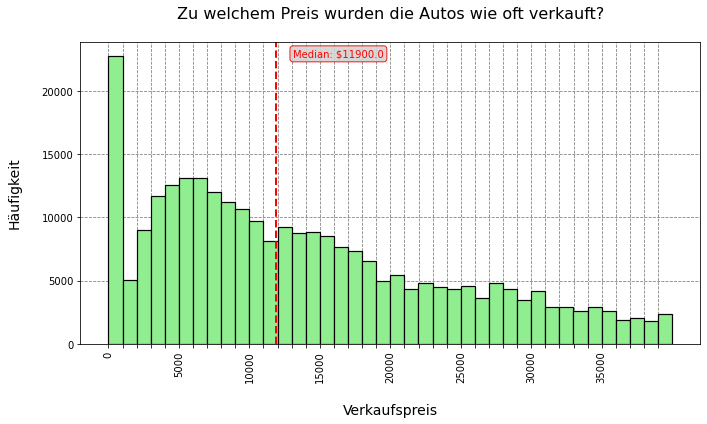

In [70]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

# !!! Häufigkeiten, die von Matplotlib bei Erstellung des Histogramms berechnet
# werden abspeichern
haeufigkeiten = plt.hist( autos_typische_verkaufspreise["Preis"],
                          bins=40, edgecolor='black', linewidth=1.2,
                          color="lightgreen", density=False )

ax = plt.gca()
ax.set_axisbelow(True)
ax.ticklabel_format(useOffset=False, style='plain')

x_ticks = np.arange(0, 40000, 1000)
ax.set_xticks(x_ticks)

x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.axvline(verkaufspreis_median, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='lightgray', edgecolor="red", alpha=0.9)
plt.text(verkaufspreis_median*1.1, max_ylim*0.95,
         'Median: ${:.1f}'.format(verkaufspreis_median),
         bbox=props, color="red")

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

In [71]:
type(haeufigkeiten)

tuple

In [72]:
haeufigkeiten

(array([22750.,  5070.,  9029., 11711., 12521., 13076., 13075., 11964.,
        11248., 10662.,  9685.,  8135.,  9265.,  8787.,  8862.,  8525.,
         7660.,  7302.,  6524.,  4960.,  5446.,  4354.,  4777.,  4521.,
         4291.,  4603.,  3640.,  4810.,  4340.,  3487.,  4146.,  2940.,
         2896.,  2577.,  2908.,  2619.,  1878.,  2073.,  1796.,  2387.]),
 array([    0.  ,   999.75,  1999.5 ,  2999.25,  3999.  ,  4998.75,
         5998.5 ,  6998.25,  7998.  ,  8997.75,  9997.5 , 10997.25,
        11997.  , 12996.75, 13996.5 , 14996.25, 15996.  , 16995.75,
        17995.5 , 18995.25, 19995.  , 20994.75, 21994.5 , 22994.25,
        23994.  , 24993.75, 25993.5 , 26993.25, 27993.  , 28992.75,
        29992.5 , 30992.25, 31992.  , 32991.75, 33991.5 , 34991.25,
        35991.  , 36990.75, 37990.5 , 38990.25, 39990.  ]),
 <BarContainer object of 40 artists>)

In [73]:
haeufigkeiten[0]

array([22750.,  5070.,  9029., 11711., 12521., 13076., 13075., 11964.,
       11248., 10662.,  9685.,  8135.,  9265.,  8787.,  8862.,  8525.,
        7660.,  7302.,  6524.,  4960.,  5446.,  4354.,  4777.,  4521.,
        4291.,  4603.,  3640.,  4810.,  4340.,  3487.,  4146.,  2940.,
        2896.,  2577.,  2908.,  2619.,  1878.,  2073.,  1796.,  2387.])

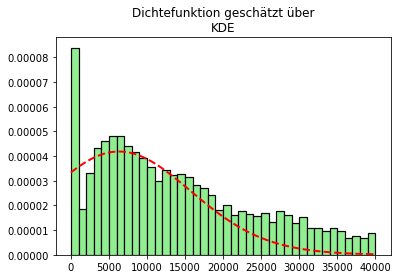

In [74]:
from scipy import stats

# `ppf()`: percent point function (inverse of cdf — percentiles).
x = np.linspace(start=0, stop=40000, num=250)

gkde = stats.gaussian_kde(dataset=haeufigkeiten[0], bw_method=2.0)

fig, ax = plt.subplots()
ax.hist( autos_typische_verkaufspreise["Preis"],
         bins=40, edgecolor='black', linewidth=1.2,
         color="lightgreen", density=True )

ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='red', lw=2,
        label='PDF Estimated via KDE')

ax.ticklabel_format(useOffset=False, style='plain')

ax.set_title("Dichtefunktion geschätzt über\nKDE")

plt.show()

# Analyse eines kategorialen Merkmals

Wir nehmen als Beispiel die Kraftstoff-Spalte.

In [75]:
tabelle

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
0,4900,2006.00000,bmw,x3 3.0i,gas,87046.00000,blue,al
1,2000,1974.00000,chevrolet,c-10,gas,190000.00000,blue,al
2,19500,2005.00000,ford,f350 lariat,diesel,116000.00000,blue,al
3,29590,2016.00000,toyota,tacoma double cab sr5,gas,33290.00000,red,al
4,39990,2012.00000,ford,mustang shelby gt500 coupe,gas,9692.00000,blue,al
...,...,...,...,...,...,...,...,...
285872,5300,2013.00000,chevrolet,captiva,gas,140000.00000,blue,wi
285873,14995,2014.00000,cadillac,srx,gas,83790.00000,silver,wi
285874,17895,2018.00000,hyundai,tucson,gas,31888.00000,white,wi
285875,17900,2014.00000,cadillac,cts coupe awd,gas,53000.00000,black,wy


In [76]:
antriebe = tabelle["Kraftstoff"].unique()

In [77]:
antriebe

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [78]:
anz_pro_antrieb = {}

for antrieb in antriebe:
    gefiltert = tabelle[ tabelle["Kraftstoff"] == antrieb ]
    anzahl = gefiltert.shape[0]
    print( f"Antrieb: {antrieb}, {anzahl} Mal" )
    anz_pro_antrieb[antrieb] = anzahl

Antrieb: gas, 252130 Mal
Antrieb: diesel, 16395 Mal
Antrieb: other, 11328 Mal
Antrieb: hybrid, 4022 Mal
Antrieb: electric, 1719 Mal


In [79]:
anz_pro_antrieb

{'gas': 252130,
 'diesel': 16395,
 'other': 11328,
 'hybrid': 4022,
 'electric': 1719}

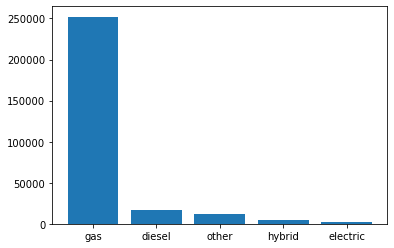

In [80]:
x = [antrieb for antrieb in anz_pro_antrieb]
y = [anz_pro_antrieb[antrieb] for antrieb in anz_pro_antrieb]

plt.bar(x,y)
plt.show()

Balkendiagramm mit Zahlen:

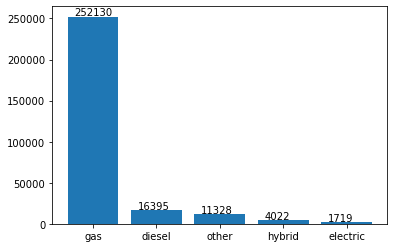

In [81]:
fig1, ax1 = plt.subplots()

x = [antrieb for antrieb in anz_pro_antrieb]
y = [anz_pro_antrieb[antrieb] for antrieb in anz_pro_antrieb]

plt.bar(x,y)

for i, anzahl in enumerate(y):
        ax1.text(i - 0.3, anzahl + 2000, f"{anzahl}", color='black')
        
plt.show()    

# Scatter-Matrix

array([[<AxesSubplot:xlabel='Preis', ylabel='Preis'>,
        <AxesSubplot:xlabel='Baujahr', ylabel='Preis'>,
        <AxesSubplot:xlabel='km-Stand', ylabel='Preis'>],
       [<AxesSubplot:xlabel='Preis', ylabel='Baujahr'>,
        <AxesSubplot:xlabel='Baujahr', ylabel='Baujahr'>,
        <AxesSubplot:xlabel='km-Stand', ylabel='Baujahr'>],
       [<AxesSubplot:xlabel='Preis', ylabel='km-Stand'>,
        <AxesSubplot:xlabel='Baujahr', ylabel='km-Stand'>,
        <AxesSubplot:xlabel='km-Stand', ylabel='km-Stand'>]], dtype=object)

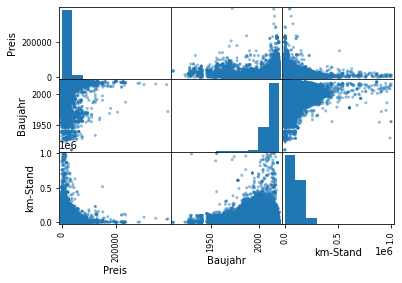

In [82]:
pd.plotting.scatter_matrix(tabelle)